<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Machine Vision Learning
</font>
<hr/>
<font color="#800080" size=5>
LAB 5 : Smoothing, Convolution, Gradient and Edge Detection
<br>
</font>
<font size=5>
Instructor: Dr. H. Mohammad Zadeh
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
</font>

</div></font>

In [1]:
Name = "Ali Sadeghian"
SN = "400101464"

## Introduction


In the field of image processing, various techniques are employed to enhance the quality of images, detect edges, and manipulate the structure of objects. Three crucial categories of image processing techniques are **smoothing**, **gradient-based edge detection**, and **morphological transformations**. Each of these methods serves different purposes but can be combined to address complex problems in computer vision, such as noise reduction, object segmentation, and background removal.

**Smoothing** filters, including **mean**, **median**, and **Gaussian** filters, are used to reduce noise and blur an image. By applying these filters, we can eliminate unwanted details and focus on the essential features. The mean filter averages pixel values, while the median filter replaces each pixel with the median value of its neighborhood, making it more effective in removing salt-and-pepper noise. The Gaussian filter, on the other hand, uses a weighted average to smooth the image while preserving edges better than the mean filter.

**Edge detection**, implemented through **Sobel**, **Prewitt**, and **Canny** filters, helps to identify boundaries between different regions in an image. The Sobel and Prewitt filters use convolution with specific kernels to detect horizontal and vertical edges. The Sobel filter is more sensitive to noise, while the Prewitt filter is designed to emphasize edges with less noise sensitivity. The **Canny edge detector** is a multi-step algorithm that identifies edges by detecting intensity gradients, applying non-maximum suppression, and using two thresholds to control edge detection sensitivity. These gradient-based methods are essential for extracting structural information from an image, such as object outlines or contours.

**Morphological transformations** are applied to binary images to modify their structure. The most common morphological operations are **erosion**, **dilation**, **opening**, and **closing**. Erosion shrinks objects in an image, removing small noise or details, while dilation expands objects, filling gaps and enhancing features. Opening is a combination of erosion followed by dilation, which helps in removing small white noise. Conversely, closing involves dilation followed by erosion, which fills small dark holes in an object. These operations are particularly useful for processing binary masks or segmenting objects in an image.

In this homework, we will apply these techniques in the context of video processing and background subtraction. The goal is to isolate moving objects from a static background by combining **smoothing**, **edge detection**, and **morphological transformations**. We will first smooth the video frames to reduce noise, apply edge detection to identify object boundaries, and finally use morphological operations to clean up the foreground mask. This approach will help in creating a clean, segmented image where moving objects are clearly separated from the background, demonstrating the combined power of these image processing techniques in real-world applications like video surveillance and object tracking.

Through this exploration, we will gain a deeper understanding of how smoothing, gradient-based edge detection, and morphological operations can work together to address complex challenges in image processing.

## Libraries

In [2]:
import cv2
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import random

## Reading data

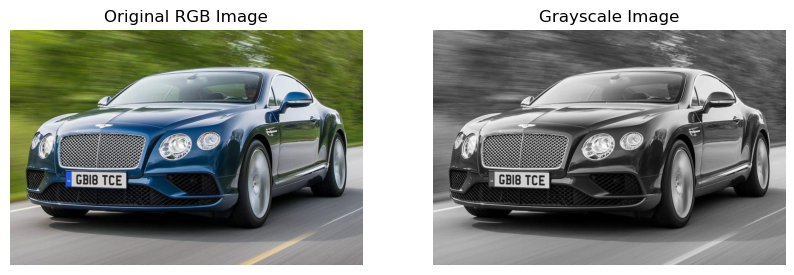

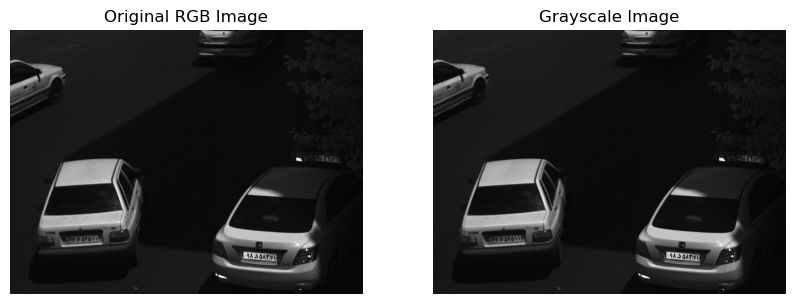

In [3]:
# Specify the relative path where the images are located
input_folder = "./"  

# List to store grayscale images
gray_images = []

# Get a list of all image files in the specified folder
image_files = glob.glob(os.path.join(input_folder, "*.jpg"))  # Adjust extension if needed

for image_file in image_files:
    # Read the image in RGB format
    image_rgb = cv2.imread(image_file)

    # Convert the RGB image to grayscale
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

    # Append the grayscale image to the list
    gray_images.append(image_gray)

    # Display the original and grayscale images
    plt.figure(figsize=(10, 5))

    # Show the original image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
    plt.title("Original RGB Image")
    plt.axis("off")

    # Show the grayscale image
    plt.subplot(1, 2, 2)
    plt.imshow(image_gray, cmap='gray')
    plt.title("Grayscale Image")
    plt.axis("off")

    plt.show()

## Smoothing and Convolution in Image Processing

**Smoothing Filters** are used in image processing to reduce noise and smooth out variations in intensity within an image. These filters apply a mathematical operation to each pixel based on its neighbors, aiming to produce an image where abrupt changes (such as noise) are minimized.

### Mathematical Concept Behind Smoothing

In image processing, smoothing can be considered a type of *convolution*, which is a fundamental operation that combines two functions (in this case, an image and a filter kernel) to produce a new function (the filtered image).

1. **Convolution** is defined mathematically as the integral of the product of two functions (or signals) after one is reversed and shifted. For a discrete image and kernel, the 2D convolution operation is written as:

   $$
   I'(x, y) = (I * K)(x, y) = \sum_{i=-k}^{k} \sum_{j=-k}^{k} I(x+i, y+j) \cdot K(i, j)
   $$

   Where:
   - $ I(x, y) $ is the input image.
   - $ K(i, j) $ is the kernel (a matrix used for the filter).
   - $ I'(x, y) $ is the output (smoothed) image.
   - The kernel $ K(i, j) $ is centered at pixel $ (x, y) $ and moves across the entire image.

2. **Kernel (Filter)**: The filter is a matrix of weights applied to the pixel values in the image. Common smoothing filters are:
   - **Mean Filter**: The kernel is usually a matrix with all elements equal, like:

     $$
     K = \frac{1}{N^2} \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}
     $$

     The kernel averages the values of the surrounding pixels. This is why it is also known as a *box filter*. This operation is good at removing high-frequency noise, but it can blur edges.

   - **Median Filter**: This non-linear filter replaces the pixel value with the median of the pixels in the neighborhood defined by the kernel. It is particularly effective in removing salt-and-pepper noise from an image without blurring edges as much as mean filters.

   - **Gaussian Filter**: The Gaussian filter is used to apply a weighted average, where the weights follow a Gaussian distribution. The formula for the 2D Gaussian kernel is:

     $$
     K(x, y) = \frac{1}{2 \pi \sigma^2} \exp \left( -\frac{x^2 + y^2}{2 \sigma^2} \right)
     $$

     Where:
     - $ \sigma $ controls the spread of the Gaussian (i.e., the amount of smoothing).
     - This filter is often used to remove Gaussian noise and preserve edges better than the mean filter.

### Mathematical Background for Each Filter

1. **Mean Filter**:
   - The mean filter uses a kernel where all values are the same. For each pixel in the image, it averages the pixel and its surrounding pixels, creating a smoother result.

2. **Median Filter**:
   - For each pixel, this filter sorts the values of the pixels within the kernel's neighborhood and assigns the median value to the center pixel. This approach can effectively remove noise such as salt-and-pepper noise, without significantly affecting edges.

3. **Gaussian Filter**:
   - The Gaussian filter assigns higher weights to pixels closer to the center of the kernel and lower weights to those farther away. This type of filter smooths images in a way that resembles the bell-shaped Gaussian curve, making it particularly effective for blurring while preserving edges better than mean filters.

### Practical Application of Smoothing Filters

- **Image Smoothing**: Reduces noise and detail in images, making them more aesthetically pleasing or suitable for further analysis (such as edge detection).
  
- **Noise Reduction**: By applying filters like mean and median, high-frequency noise can be reduced.

- **Preprocessing for Edge Detection**: Before applying edge detection filters like Sobel or Canny, smoothing can help reduce the effect of noise and avoid false edges.


In [4]:
def apply_smoothing_filter(image, filter_type, kernel_size):
    """
    Applies a specified smoothing filter to an image with a given kernel size.

    Parameters:
    - image (numpy.ndarray): The input grayscale image.
    - filter_type (str): The type of filter to apply ('mean', 'median', 'gaussian').
    - kernel_size (int): The size of the kernel to use.

    Returns:
    - smoothed_image (numpy.ndarray): The filtered (smoothed) image.
    """
    if filter_type == 'mean':
        # Apply mean filter
        smoothed_image = cv2.blur(image, (kernel_size, kernel_size))
    elif filter_type == 'median':
        # Apply median filter
        smoothed_image = cv2.medianBlur(image, kernel_size)
    elif filter_type == 'gaussian':
        # Apply Gaussian filter
        smoothed_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    else:
        raise ValueError("Unknown filter type. Use 'mean', 'median', or 'gaussian'.")

    return smoothed_image

In [5]:
def apply_all_filters(images, kernel_sizes=[3, 5, 7]):
    """
    Applies mean, median, and Gaussian filters with different kernel sizes to a list of images.

    Parameters:
    - images (list of numpy.ndarray): List of grayscale images.
    - kernel_sizes (list of int): List of kernel sizes to apply for each filter.

    Returns:
    - filtered_images (dict): A dictionary with structure 
      {image_index: {filter_type: {kernel_size: smoothed_image}}}
    """
    filter_types = ['mean', 'median', 'gaussian']
    filtered_images = {}

    for idx, image in enumerate(images):
        filtered_images[idx] = {}
        for filter_type in filter_types:
            filtered_images[idx][filter_type] = {}
            for kernel_size in kernel_sizes:
                smoothed_image = apply_smoothing_filter(image, filter_type, kernel_size)
                filtered_images[idx][filter_type][kernel_size] = smoothed_image

    return filtered_images

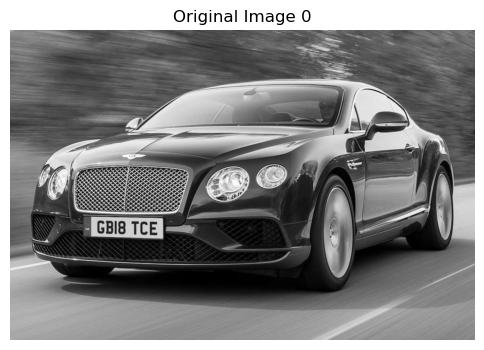

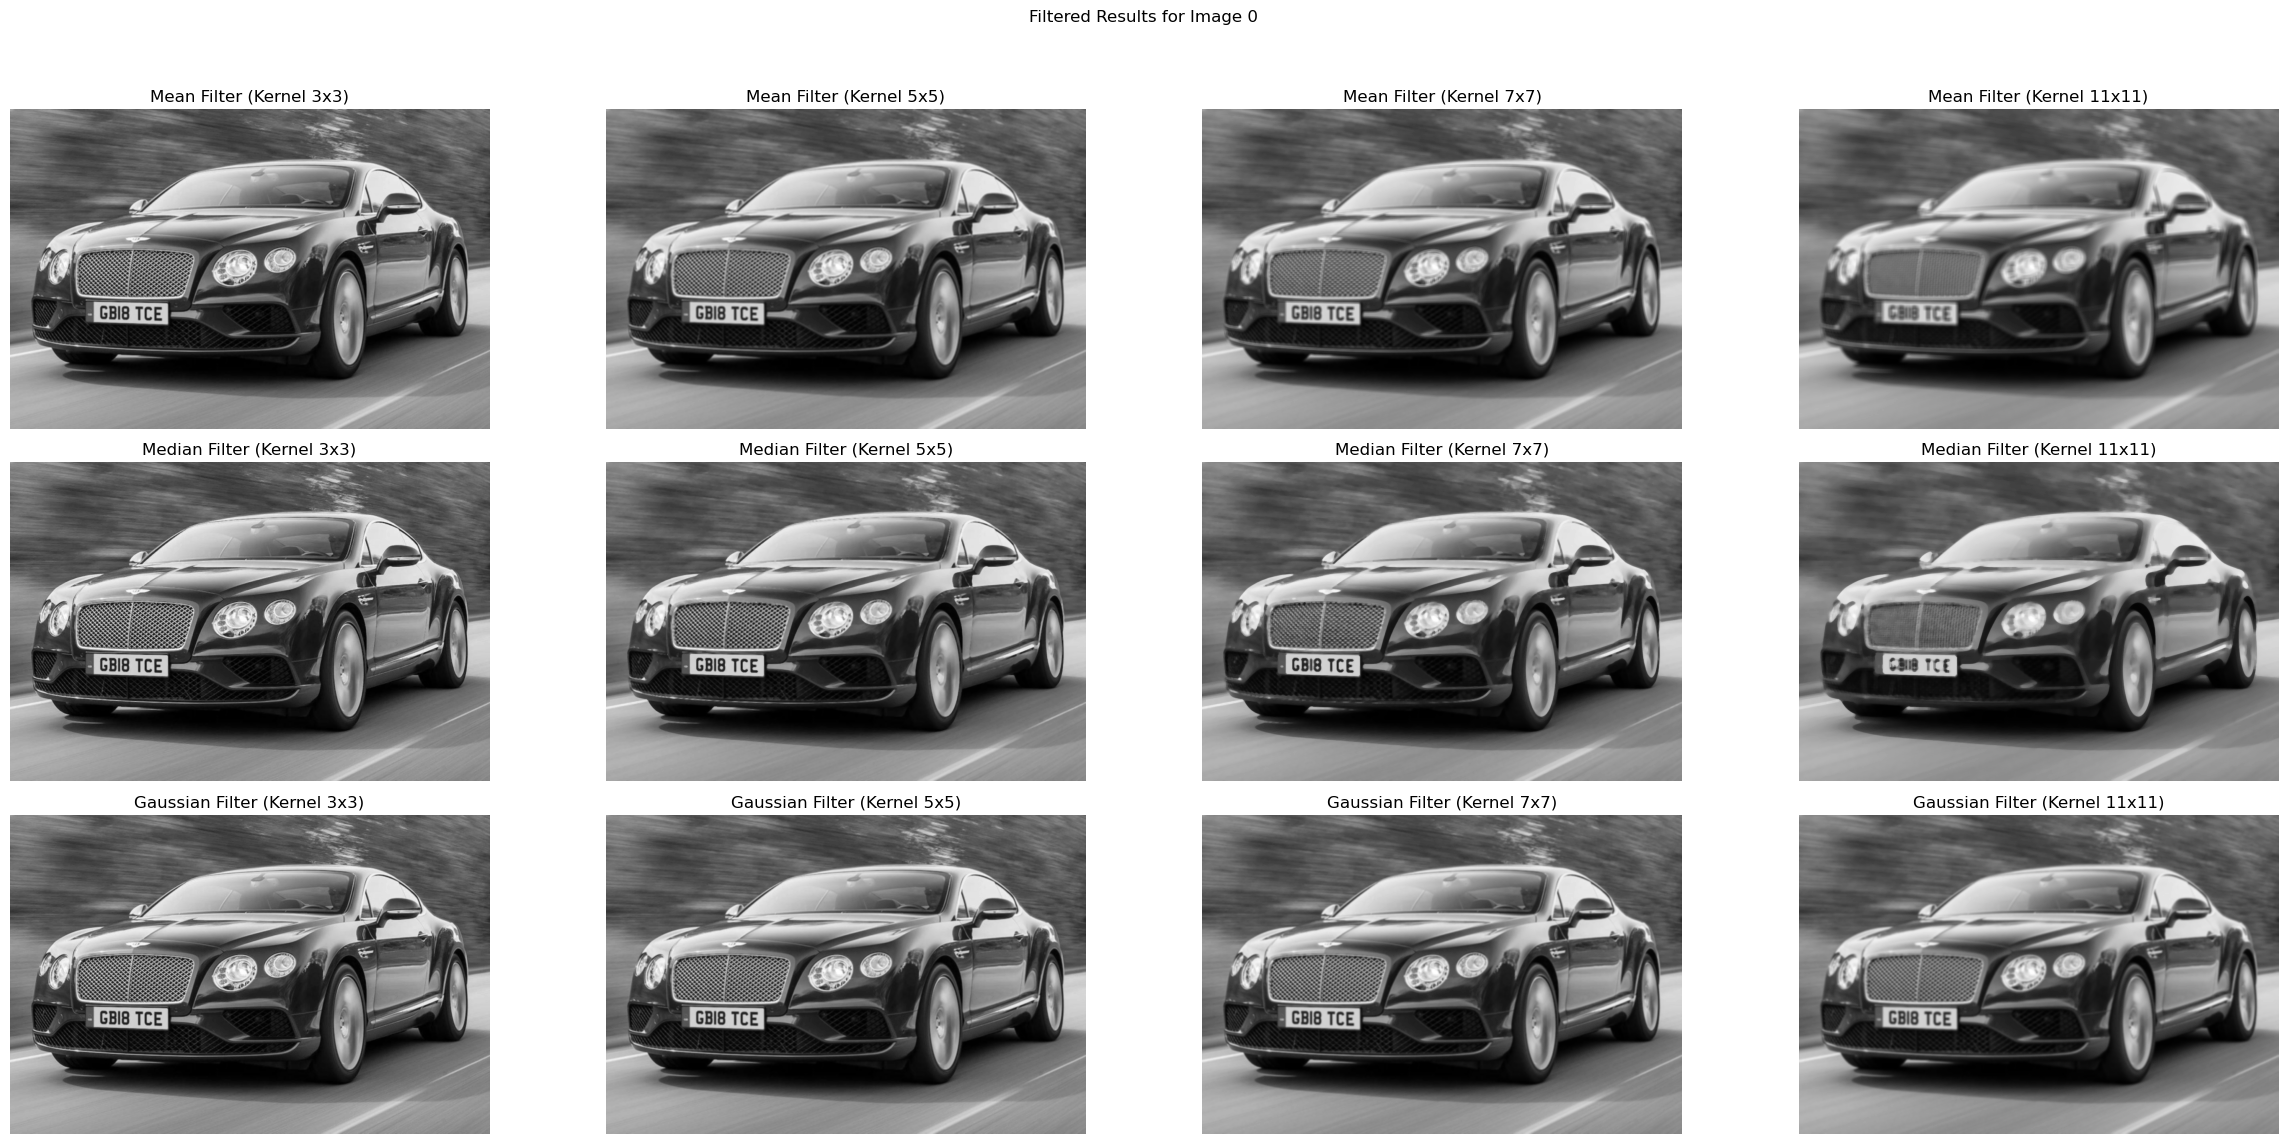

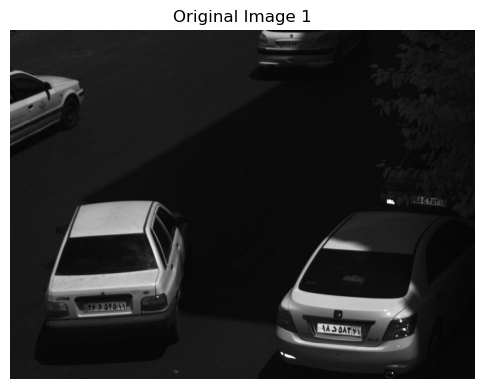

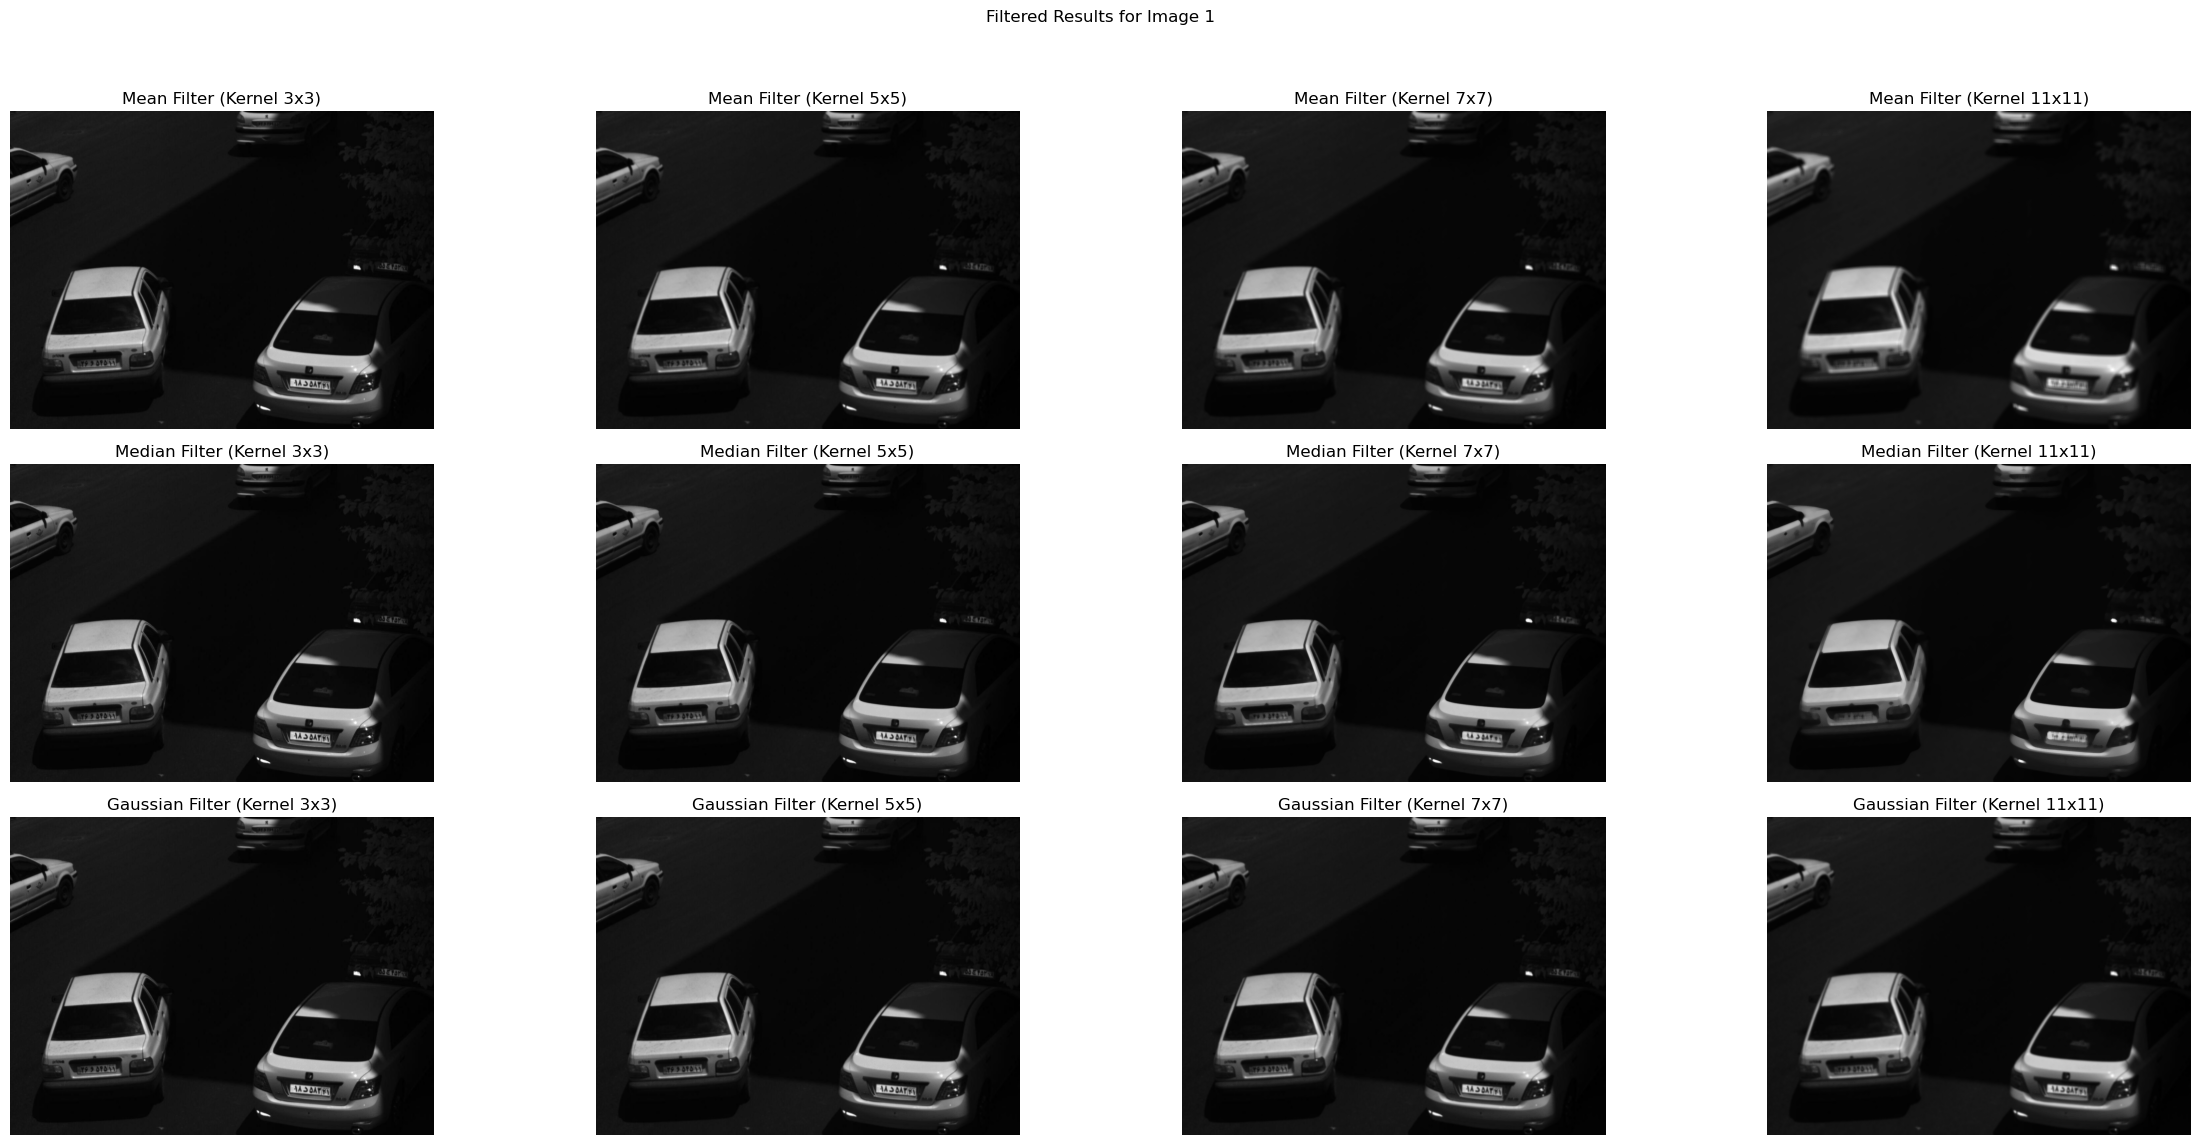

In [6]:
# Apply filters to all images in gray_images list
kernel_sizes = [3, 5, 7, 11]
filtered_images = apply_all_filters(gray_images, kernel_sizes)

# Plot the results for a few random images from gray_images
num_images_to_display = 2  # Number of images to display for comparison
selected_indices = random.sample(range(len(gray_images)), num_images_to_display)

for idx in selected_indices:
    # Plot the original grayscale image in its own figure
    plt.figure(figsize=(6, 6))
    plt.imshow(gray_images[idx], cmap='gray')
    plt.title(f"Original Image {idx}")
    plt.axis("off")
    plt.show()

    # Plot the filtered images in another figure
    fig, axes = plt.subplots(3, len(kernel_sizes), figsize=(6*len(kernel_sizes), 3*len(kernel_sizes)))
    fig.suptitle(f"Filtered Results for Image {idx}")
    
    for i, filter_type in enumerate(['mean', 'median', 'gaussian']):
        for j, kernel_size in enumerate(kernel_sizes):
            # Retrieve the filtered image
            smoothed_image = filtered_images[idx][filter_type][kernel_size]
            
            # Plot the smoothed image
            ax = axes[i, j]
            ax.imshow(smoothed_image, cmap='gray')
            ax.set_title(f"{filter_type.capitalize()} Filter (Kernel {kernel_size}x{kernel_size})")
            ax.axis("off")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

### Answer on the Impact of Kernel Size and Filters

When applying different smoothing filters (mean, median, and Gaussian) with various kernel sizes (e.g., 3x3, 5x5, and 7x7), the impact on the image can vary significantly. The choice of kernel size and filter type plays a crucial role in the extent of image smoothing, noise reduction, and preservation of image details. Here's an analysis of the effects:

#### 1. **Mean Filter**
The **mean filter** works by averaging the pixel values in a given neighborhood defined by the kernel. It is often used for smoothing out noise in images, but it has a downside in that it can blur edges and fine details.
   - **Kernel 3x3**: A smaller kernel removes small amounts of noise while preserving a relatively good amount of image detail. However, it may still blur minor edges.
   - **Kernel 5x5 and 7x7**: As the kernel size increases, the smoothing effect becomes more pronounced. Larger kernels result in greater blurring of the image, which can reduce sharpness and cause edges to appear more diffuse. Larger kernels are more effective in removing noise, but they might significantly blur the image and degrade fine details.

#### 2. **Median Filter**
The **median filter** replaces each pixel with the median of its neighbors within the kernel. This filter is especially useful for removing "salt and pepper" noise (random black and white pixels) while preserving edges better than the mean filter.
   - **Kernel 3x3**: A small kernel size can effectively remove small noise while keeping the majority of image details intact. However, it might not be as effective for larger noise or more complex patterns.
   - **Kernel 5x5 and 7x7**: Larger kernels are better at removing larger noise spots, but they can also blur image features more. While median filters preserve edges better than the mean filter, increasing the kernel size may still soften the details and smooth out textures.

#### 3. **Gaussian Filter**
The **Gaussian filter** applies a weighted average where the central pixels in the kernel are given more weight. This filter is well-suited for reducing Gaussian noise in images while preserving the overall structure of the image.
   - **Kernel 3x3**: A small Gaussian kernel offers mild smoothing, which reduces noise without significantly affecting the edges and details of the image. It is typically used for light noise reduction.
   - **Kernel 5x5 and 7x7**: Larger Gaussian kernels perform more aggressive smoothing, which can help eliminate more noise, but with the downside of slightly blurring the image. However, Gaussian filters tend to preserve edges better than mean filters because of their bell-shaped weighting, which makes them more suitable for tasks that require edge preservation.

### Impact of Kernel Size:
   - **Small Kernels (e.g., 3x3)**: Smaller kernels have a more subtle smoothing effect and generally preserve more details of the image, including edges. They are less aggressive in noise removal but suitable for mild smoothing.
   - **Larger Kernels (e.g., 5x5, 7x7)**: Larger kernels provide stronger smoothing, making them more effective at removing noise. However, they also result in more significant blurring of the image, causing a loss of sharpness, details, and edges. The larger the kernel, the greater the trade-off between noise reduction and image detail preservation.

### Summary of Filter and Kernel Size Effects:
- **Mean Filter**: Best for removing general noise but can blur edges and fine details. Larger kernels result in stronger smoothing and more loss of detail.
- **Median Filter**: Effective for removing salt-and-pepper noise without blurring edges as much as the mean filter. Larger kernels are better at removing large noise but can still blur details if too large.
- **Gaussian Filter**: Excellent at removing Gaussian noise and preserving image structure. Larger kernels reduce noise more effectively but at the cost of blurring details and edges.

In conclusion, the choice of filter and kernel size depends on the specific needs of the task. If you need to preserve edges and fine details, smaller kernels or median filtering are preferable. If you are focused on removing more significant noise and can afford some loss in image sharpness, larger kernels (especially with Gaussian filters) will provide better results.

## Gradient and Edge Detection

Edge detection is an essential operation in image processing, often used to highlight areas where significant changes in intensity occur in an image. These changes typically correspond to the boundaries between different objects or regions in an image. In this context, we apply different gradient-based filters and edge detection techniques such as Sobel, Prewitt, and Canny filters, which differ in their approach and sensitivity to edges.

### 1. **Sobel Filter**
The **Sobel operator** is a discrete differentiation operator that computes an approximation of the gradient of the image intensity function. It is used to detect edges by measuring the rate of change in pixel intensity. The Sobel operator uses two kernels: one to detect edges in the horizontal direction (Gx) and one for the vertical direction (Gy). The gradient magnitude is then computed by combining the horizontal and vertical gradients:

$$
G = \sqrt{G_x^2 + G_y^2}
$$

Where:
- $ G_x $ is the gradient in the x-direction (horizontal edges),
- $ G_y $ is the gradient in the y-direction (vertical edges).

Mathematically, the Sobel kernel for the x and y directions can be written as:

$$
Sobel_x = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}
\quad
Sobel_y = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
$$

The Sobel filter is particularly useful for detecting edges in noisy images, as it is a smoothing operator that reduces high-frequency noise while emphasizing edges.

- **Kernel Size Impact**: The kernel size (e.g., 3x3, 5x5) affects the size of the neighborhood that is analyzed for edge detection. Larger kernels capture more surrounding information, which can reduce noise, but it may also result in edge blurring.

### 2. **Prewitt Filter**
The **Prewitt operator** is similar to the Sobel operator in that it also computes image gradients to highlight edges, but it uses different kernels. Prewitt filters are used to approximate the gradient in both the horizontal and vertical directions.

$$
Prewitt_x = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}
\quad
Prewitt_y = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
$$

The primary difference between Sobel and Prewitt is that Prewitt uses simpler kernels and tends to be more sensitive to noise. Like Sobel, it detects edges based on gradients, but with slightly different behavior due to the weights in the kernels.

- **Kernel Size Impact**: As with Sobel, the kernel size in Prewitt filters controls the degree of smoothing and edge sensitivity. Larger kernels capture more surrounding data but can blur fine details.

#### 3. **Canny Edge Detector**
The **Canny edge detector** is a multi-step edge detection algorithm that is more complex and sophisticated compared to Sobel and Prewitt filters. It works by detecting areas of rapid intensity change in the image, then performing non-maximum suppression and edge tracing by hysteresis to refine the edges. The Canny algorithm involves the following key steps:
1. **Smoothing**: The image is first smoothed using a Gaussian filter to reduce noise.
2. **Gradient Calculation**: The gradients in the x and y directions are computed using the Sobel filter.
3. **Non-maximum Suppression**: Thin out the edges by suppressing pixels that are not local maxima.
4. **Edge Tracking by Hysteresis**: Final edge detection is determined by setting two thresholds (low and high). If the gradient is higher than the high threshold, it is classified as an edge. If the gradient is between the thresholds, it is only classified as an edge if it is connected to a stronger edge.

The Canny filter is widely regarded as one of the best edge detection techniques because of its ability to detect weak edges while being more resistant to noise.

- **Threshold Impact**: The two thresholds in the Canny algorithm (low and high) control the sensitivity of edge detection. Low thresholds allow more edges to be detected (including weak edges), while high thresholds are stricter and allow only the most prominent edges to be detected. The choice of thresholds affects the accuracy of edge detection, and it can vary for different images.

### Mathematical Analysis of Edge Detection Filters

- **Sobel and Prewitt Filters**: Both Sobel and Prewitt filters are linear filters that compute the gradient of the image intensity function in the x and y directions. The resulting gradients are combined to compute the gradient magnitude, which highlights edges. These filters assume that edges are characterized by a significant change in intensity, and they are most effective when the change is perpendicular to the direction of the gradient.

- **Canny Filter**: The Canny detector, on the other hand, is non-linear and more advanced in that it not only detects edges but also provides a way to suppress non-edges and weak edges that are noise. It does this by performing edge tracing by hysteresis, which improves the accuracy of edge detection in noisy images.

### Comparative Analysis
1. **Sobel vs Prewitt**: The Sobel filter is often preferred over Prewitt for edge detection due to its higher sensitivity to small gradients. This makes Sobel better suited for noisy images. Prewitt, however, is simpler and faster but is more prone to noise. Sobel also performs a slight smoothing by averaging neighboring pixels, which can help in detecting edges more clearly.

2. **Sobel and Prewitt vs Canny**: The Canny edge detector is more sophisticated than Sobel and Prewitt filters, as it involves multiple steps that refine the detected edges. While Sobel and Prewitt work by calculating gradients, Canny performs additional steps to remove false edges, making it more accurate and reliable, particularly in noisy images.

### Conclusion
- **Sobel and Prewitt Filters**: Useful for detecting edges, but with varying performance based on kernel size. Sobel tends to be more robust to noise, while Prewitt is more sensitive but simpler. Both filters work by detecting gradient changes and are effective in highlighting major edges.
  
- **Canny Filter**: Best suited for precise edge detection in images with complex noise. By using thresholding and non-maximum suppression, it provides a cleaner and more accurate edge map, especially useful for complex images where the edges are subtle.

The choice of filter depends on the specific task at hand: Sobel and Prewitt are simpler and faster but less accurate than Canny, which provides a more sophisticated and robust edge detection method.

In [7]:
def apply_edge_filter(image, filter_type, kernel_size=3, canny_threshold1=100, canny_threshold2=200):
    """
    Applies an edge detection filter to an image.

    Parameters:
    - image (numpy.ndarray): The input grayscale image.
    - filter_type (str): The type of filter to apply ('sobel', 'prewitt', 'canny').
    - kernel_size (int): Kernel size for the Sobel and Prewitt filters (default is 3).
    - canny_threshold1 (int): First threshold for the Canny filter.
    - canny_threshold2 (int): Second threshold for the Canny filter.

    Returns:
    - edge_image (numpy.ndarray): The edge-detected image.
    """
    if filter_type == 'sobel':
        gx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=kernel_size)
        gy = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=kernel_size)
        edge_image = cv2.magnitude(gx, gy)
        
    elif filter_type == 'prewitt':
        kernelx = np.array([[ -1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=np.float64)
        kernely = np.array([[ 1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float64)
        gx = cv2.filter2D(image, cv2.CV_64F, kernelx)
        gy = cv2.filter2D(image, cv2.CV_64F, kernely)
        edge_image = cv2.magnitude(gx, gy)
        
    elif filter_type == 'canny':
        edge_image = cv2.Canny(image, canny_threshold1, canny_threshold2)
        
    else:
        raise ValueError("Unknown filter type. Use 'sobel', 'prewitt', or 'canny'.")
    
    return edge_image

In [8]:
def apply_sobel_and_prewitt(images, kernel_size=3):
    """
    Applies Sobel and Prewitt filters to a list of images.

    Parameters:
    - images (list of numpy.ndarray): List of grayscale images.
    - kernel_size (int): Kernel size for the Sobel and Prewitt filters.

    Returns:
    - filtered_images (dict): Dictionary with Sobel and Prewitt images for each input image.
    """
    filtered_images = {}
    for idx, image in enumerate(images):
        filtered_images[idx] = {
            'sobel': apply_edge_filter(image, 'sobel', kernel_size),
            'prewitt': apply_edge_filter(image, 'prewitt', kernel_size)
        }
    return filtered_images

def apply_canny_meshgrid(image, thresholds1, thresholds2):
    """
    Applies a range of Canny filters to a single image with varying thresholds.

    Parameters:
    - image (numpy.ndarray): The input grayscale image.
    - thresholds1 (list): List of lower thresholds for Canny.
    - thresholds2 (list): List of upper thresholds for Canny.

    Returns:
    - canny_results (dict): Dictionary of Canny images with threshold combinations.
    """
    canny_results = {}
    for t1 in thresholds1:
        for t2 in thresholds2:
            edge_image = apply_edge_filter(image, 'canny', canny_threshold1=t1, canny_threshold2=t2)
            canny_results[(t1, t2)] = edge_image
    return canny_results

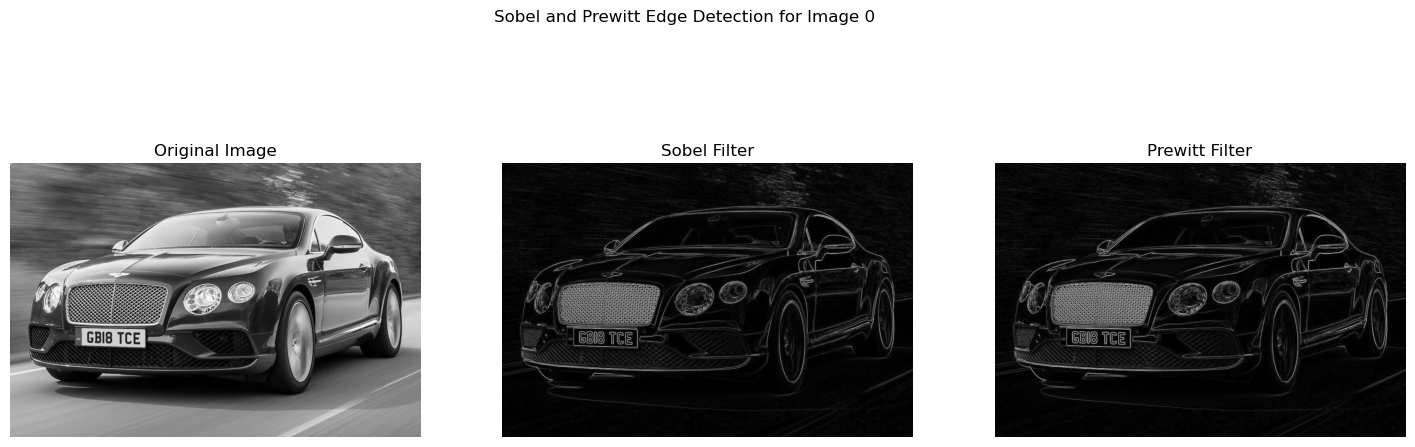

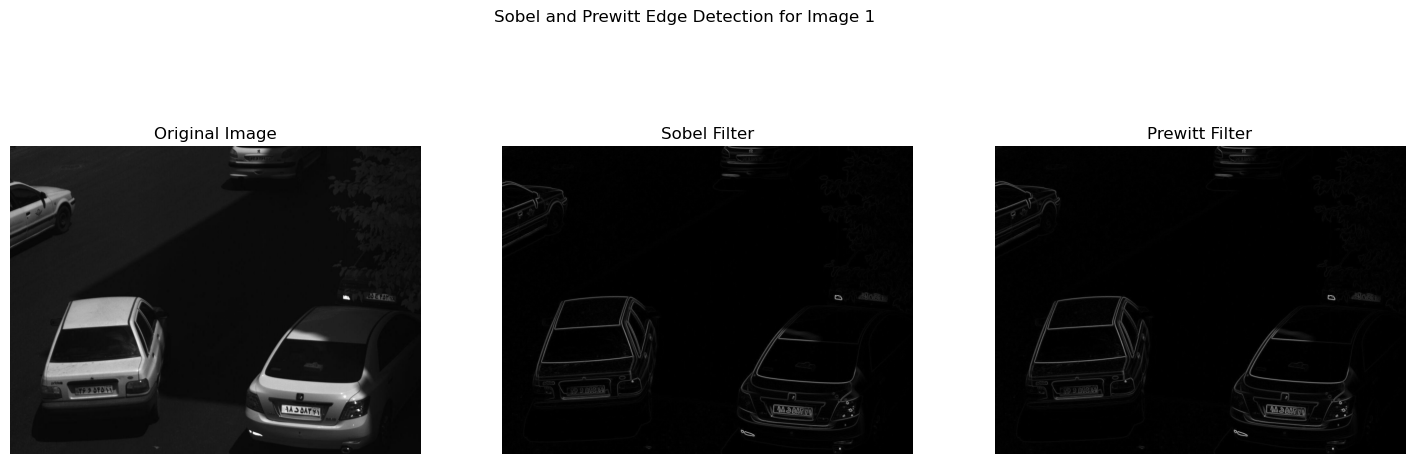

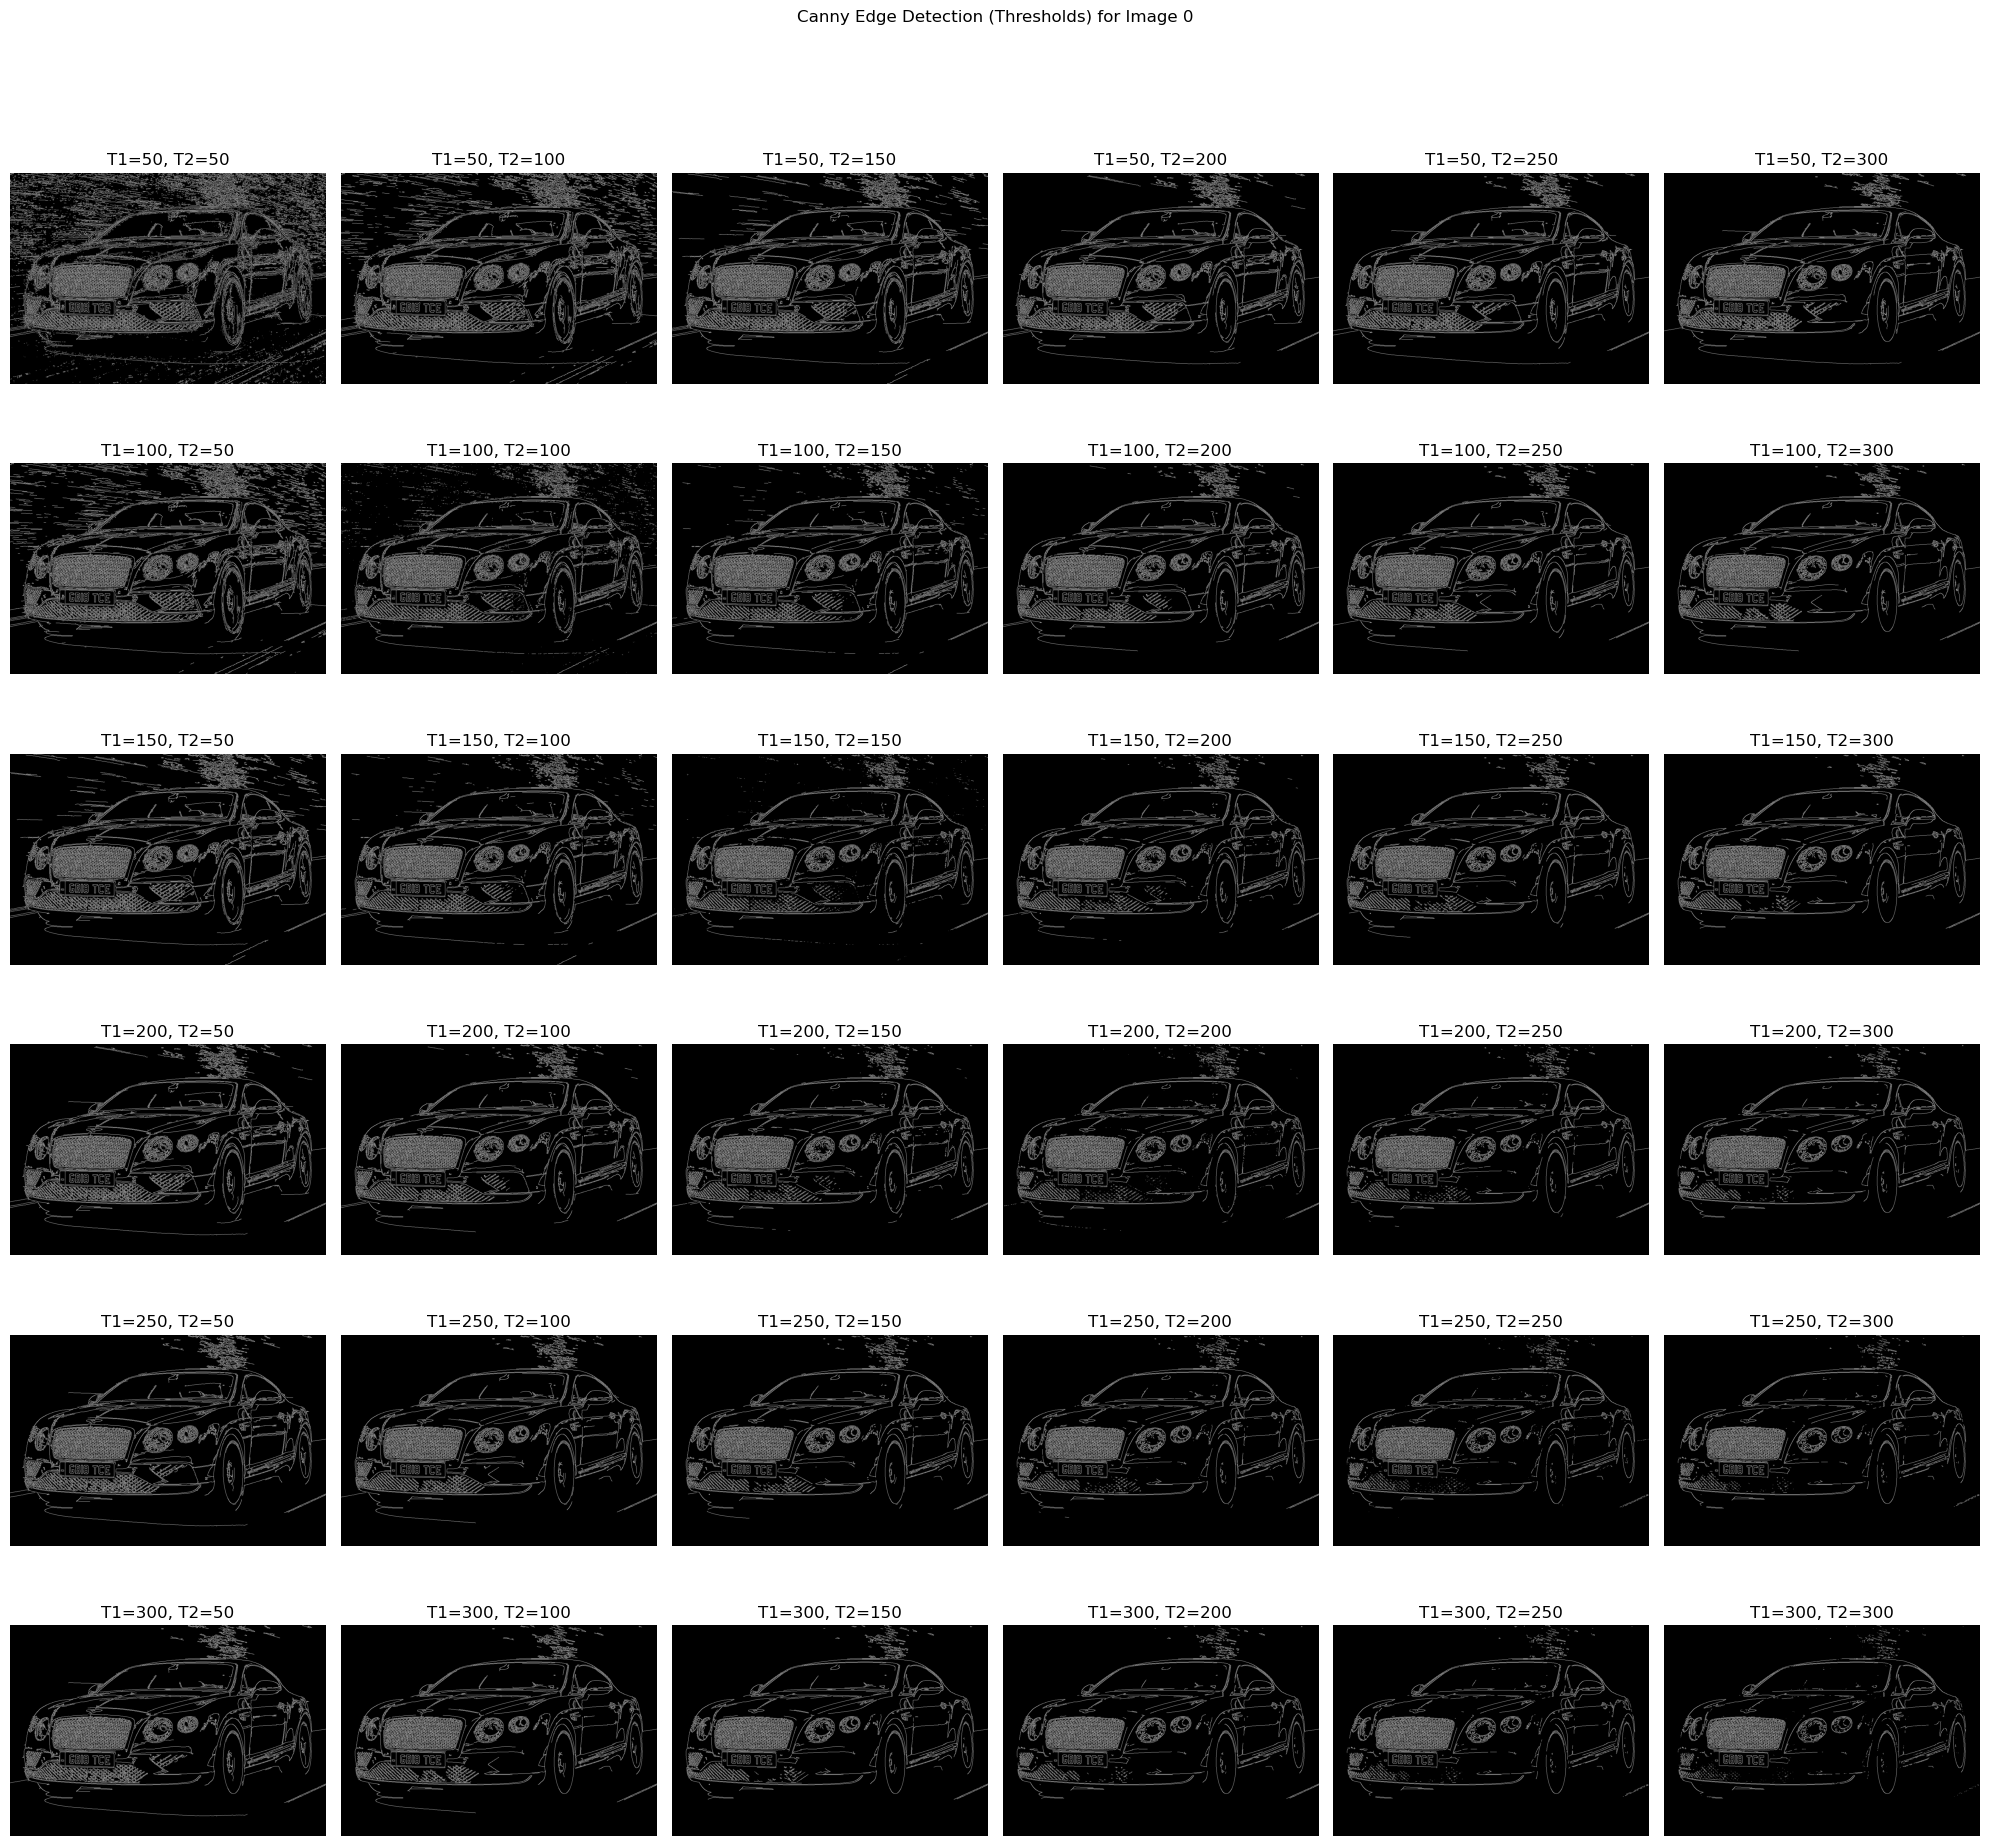

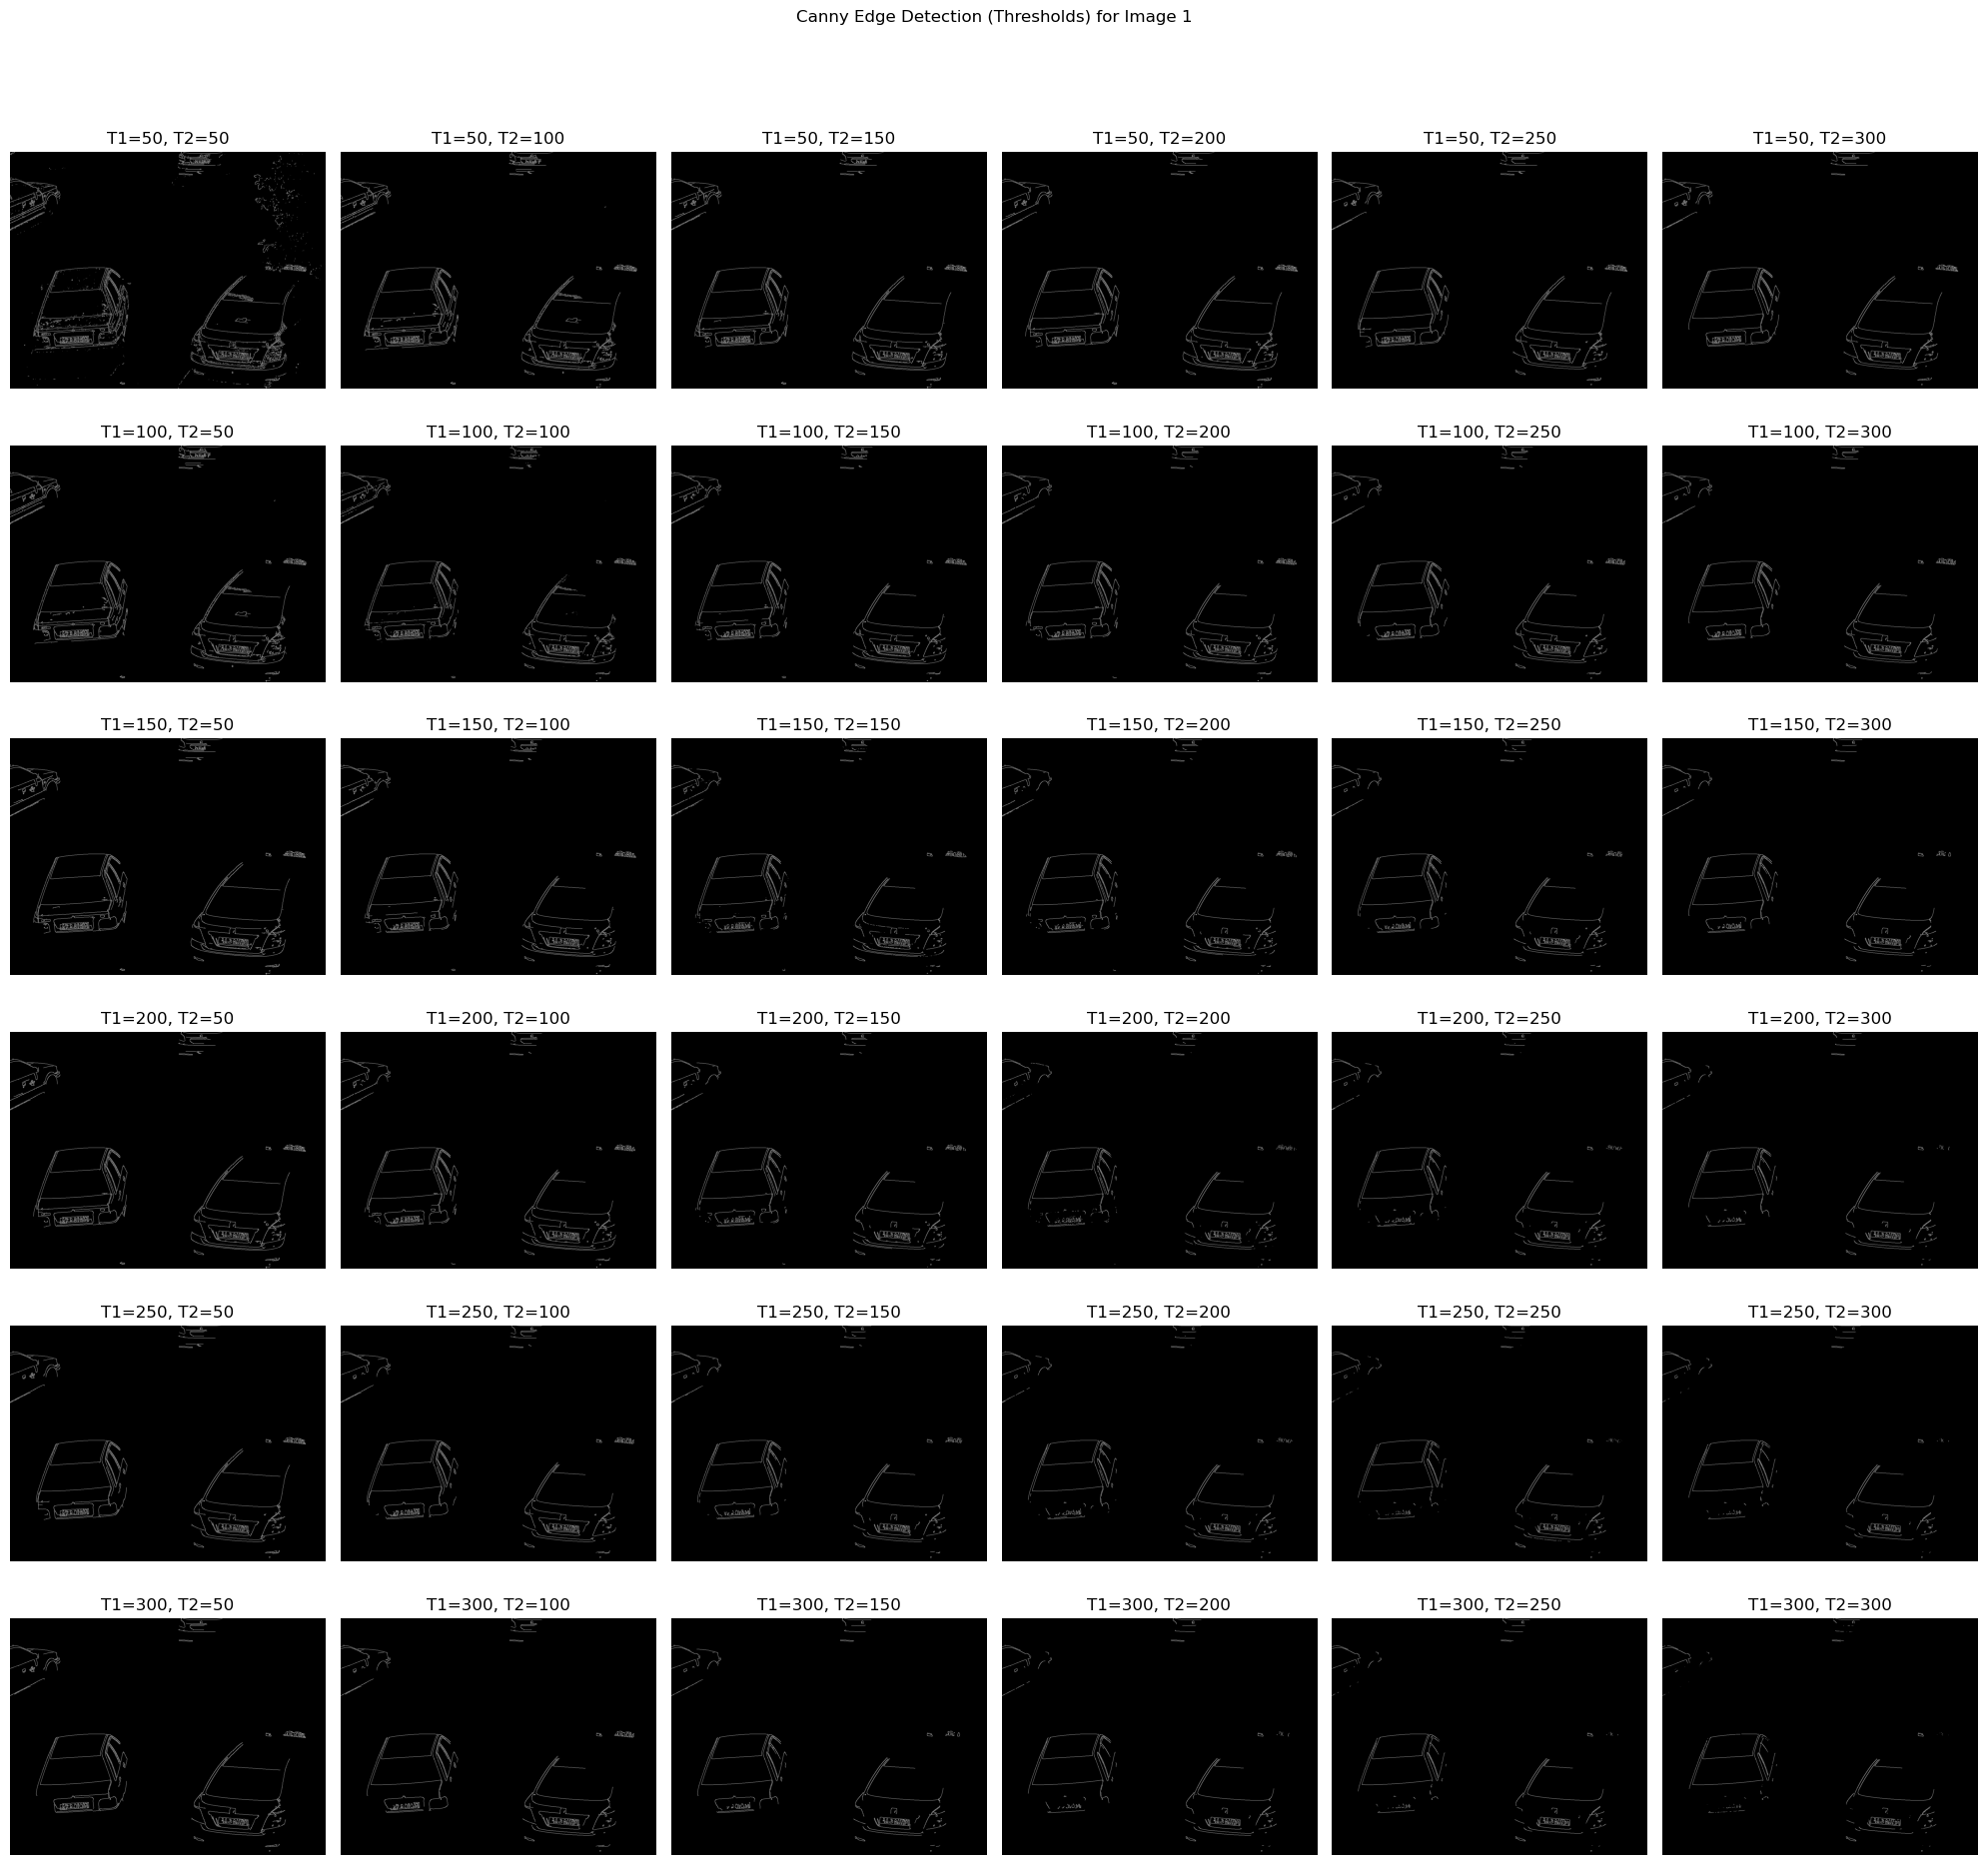

In [9]:
# Plot Sobel and Prewitt results for a few random images from gray_images
num_images_to_display = 2
selected_indices = random.sample(range(len(gray_images)), num_images_to_display)
# Extract the selected images
selected_images = [gray_images[i] for i in selected_indices]
kernel_size = 3
sobel_prewitt_images = apply_sobel_and_prewitt(selected_images, kernel_size=kernel_size)


for idx in range(num_images_to_display):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Sobel and Prewitt Edge Detection for Image {idx}")

    # Original Image
    axes[0].imshow(gray_images[selected_indices[idx]], cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Sobel Filter
    axes[1].imshow(sobel_prewitt_images[idx]['sobel'], cmap='gray')
    axes[1].set_title("Sobel Filter")
    axes[1].axis("off")

    # Prewitt Filter
    axes[2].imshow(sobel_prewitt_images[idx]['prewitt'], cmap='gray')
    axes[2].set_title("Prewitt Filter")
    axes[2].axis("off")

    plt.show()

# Canny filter threshold exploration
canny_thresholds1 = [50, 100, 150, 200, 250, 300]
canny_thresholds2 = [50, 100, 150, 200, 250, 300]
for idx in selected_indices:
    canny_results = apply_canny_meshgrid(gray_images[idx], canny_thresholds1, canny_thresholds2)
    
    # Plot the Canny results in a grid
    fig, axes = plt.subplots(len(canny_thresholds1), len(canny_thresholds2), figsize=(20, 20))
    fig.suptitle(f"Canny Edge Detection (Thresholds) for Image {idx}")
    
    for i, t1 in enumerate(canny_thresholds1):
        for j, t2 in enumerate(canny_thresholds2):
            ax = axes[i, j]
            ax.imshow(canny_results[(t1, t2)], cmap='gray')
            ax.set_title(f"T1={t1}, T2={t2}")
            ax.axis("off")
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

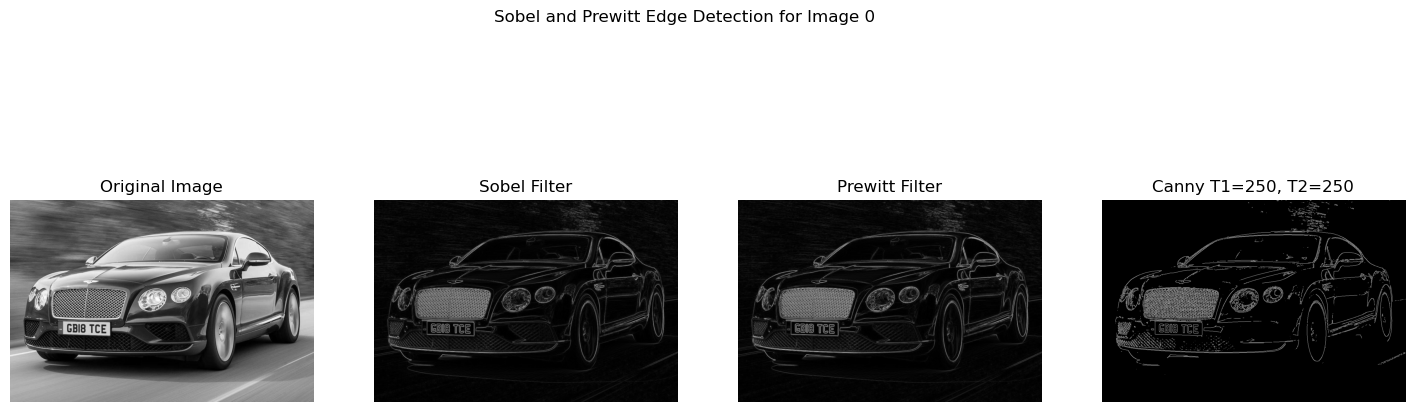

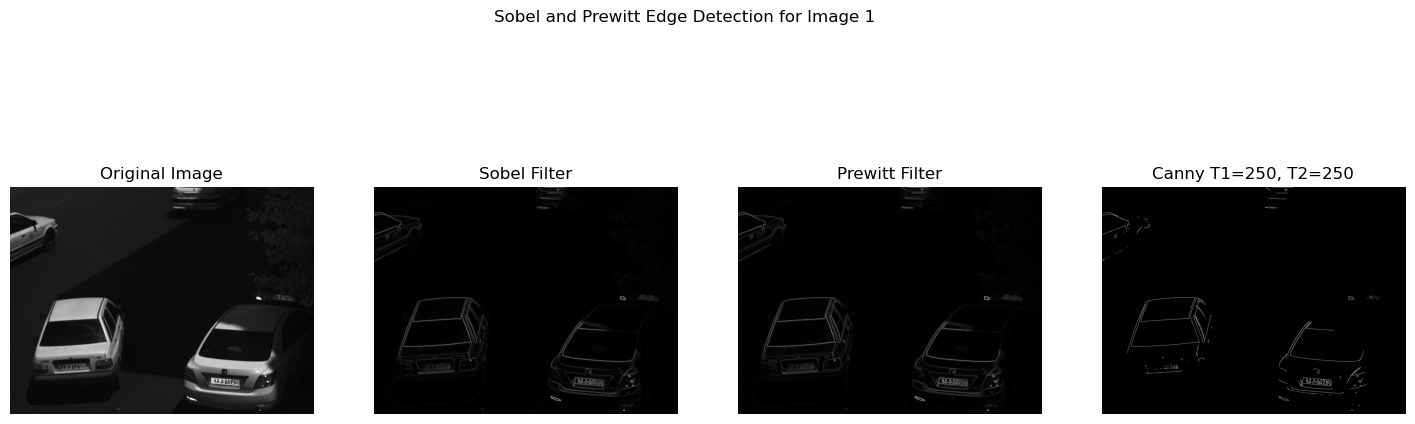

In [10]:
T1 = 250
T2 = 250
for idx in range(num_images_to_display):
    fig, axes = plt.subplots(1, 4, figsize=(18, 6))
    fig.suptitle(f"Sobel and Prewitt Edge Detection for Image {idx}")

    # Original Image
    axes[0].imshow(gray_images[selected_indices[idx]], cmap='gray')
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Sobel Filter
    axes[1].imshow(sobel_prewitt_images[idx]['sobel'], cmap='gray')
    axes[1].set_title("Sobel Filter")
    axes[1].axis("off")

    # Prewitt Filter
    axes[2].imshow(sobel_prewitt_images[idx]['prewitt'], cmap='gray')
    axes[2].set_title("Prewitt Filter")
    axes[2].axis("off")
        
    # Canny Filter
    canny_results = apply_canny_meshgrid(gray_images[selected_indices[idx]], [T1], [T2])
    axes[3].imshow(canny_results[(T1, T2)], cmap='gray')
    axes[3].set_title(f"Canny T1={T1}, T2={T2}")
    axes[3].axis("off")

    plt.show()

The images illustrate edge detection results on two different car images, using three filters: Sobel, Prewitt, and Canny. Here’s an analysis of the results for each filter:

1. **Sobel Filter**: The Sobel filter produces a relatively smooth and continuous edge outline of the car's shapes. The edges detected are more pronounced around areas with high contrast, such as the vehicle's borders, headlights, and grille details. Sobel emphasizes gradient changes in both vertical and horizontal directions, making it effective at capturing the overall structure of objects in the image.

2. **Prewitt Filter**: Similar to the Sobel filter, the Prewitt filter also captures prominent edges but with slightly less intensity. The resulting edges are somewhat lighter, especially in lower-contrast areas. This difference is because Prewitt is generally simpler and less sensitive to noise than Sobel, though both are directional edge detectors and emphasize similar areas in the image.

3. **Canny Filter (Thresholds T1=250, T2=250)**: The Canny filter produces a much sharper and binary edge representation. With high thresholds (250, 250), it detects only the most prominent edges, resulting in a sparser edge map compared to Sobel and Prewitt. It effectively isolates the boundaries of high-contrast regions but may miss subtle edges in darker or less defined parts of the image.

### Analysis & Comparison:
- **Edge Continuity**: Sobel and Prewitt offer smoother, more continuous edges, which capture more subtle details compared to Canny with high thresholds.
- **Noise Sensitivity**: Canny provides a cleaner edge map by avoiding noise, as seen in darker areas with fewer detected edges, while Sobel and Prewitt can capture even minor gradient changes.
- **Parameter Adjustment in Canny**: Adjusting the Canny filter’s threshold parameters could allow it to capture more edges in low-contrast areas, making it closer to Sobel and Prewitt’s output but with potentially sharper edges and reduced noise.

Each filter provides a unique representation, with Sobel and Prewitt giving detailed edge information and Canny being more selective and focused on prominent boundaries.

## Morphological Image Processing

In image processing, **morphological operations** are particularly useful for binary images, often to clean up noise, fill gaps, and detect structural features in the image. These operations manipulate the shape or structure of objects in a binary image using a predefined **structuring element**. The most common morphological operations are **erosion**, **dilation**, **opening**, and **closing**. These operations can be particularly useful in various applications such as background subtraction, noise removal, and object extraction.

#### Key Morphological Operations:
1. **Erosion**: This operation shrinks the white regions (objects) in a binary image. The pixel corresponding to the center of the structuring element is set to 1 only if all the pixels inside the structuring element are 1. Erosion removes small white noise and thin structures, as the shape of the foreground objects gets eroded.

    Mathematically, erosion can be represented as:
    $$
    Erosion(A) = A \ominus B
    $$
    where $ A $ is the input image and $ B $ is the structuring element.

2. **Dilation**: This operation expands the white regions (objects) in a binary image. The pixel corresponding to the center of the structuring element is set to 1 if at least one pixel inside the structuring element is 1. Dilation fills small holes and gaps in the foreground.

    Mathematically, dilation can be represented as:
    $$
    Dilation(A) = A \oplus B
    $$
    where $ A $ is the input image and $ B $ is the structuring element.

3. **Opening**: This operation is a combination of **erosion** followed by **dilation**. It is mainly used to remove small white noise from the image while preserving the shape of larger objects.

    $$
    Opening(A) = (A \ominus B) \oplus B
    $$

4. **Closing**: This operation is a combination of **dilation** followed by **erosion**. It is primarily used to fill small holes (black regions) in the foreground.

    $$
    Closing(A) = (A \oplus B) \ominus B
    $$


In [11]:
# Define paths and video settings
video_output = "output_video.mp4"

# Read the background image (static background without person)
background = cv2.imread('me.jpg')
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

# Initialize the video capture
cap = cv2.VideoCapture('me.mp4')

# Define kernel size for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))

# Get video properties for output video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Initialize the video writer with MP4 format
out = cv2.VideoWriter(video_output, cv2.VideoWriter_fourcc(*'mp4v'), fps, (frame_width, frame_height))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Stop if the video has ended

    # Convert the frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Subtract background from the frame and take absolute difference
    diff = cv2.absdiff(frame_gray, background_gray)

    # Apply binary threshold to get a binary image
    _, binary_mask = cv2.threshold(diff, 75, 255, cv2.THRESH_BINARY)

    # Perform morphological operations to clean up the mask
    eroded = cv2.erode(binary_mask, kernel, iterations=4)
    dilated = cv2.dilate(eroded, kernel, iterations=4)

    # Create a final mask by applying AND operation with the original frame
    foreground = cv2.bitwise_and(frame, frame, mask=255 - dilated)

    # Write the processed frame to the video file
    out.write(foreground)

    # Optionally, display the results (remove if not needed)
    cv2.imshow("Foreground", foreground)
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
out.release()
cv2.destroyAllWindows()

print(f"Video saved as {video_output}")


Video saved as output_video.mp4


In [12]:
# # Read the background image (static background without person)
# background = cv2.imread('me.jpg')
# background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY)

# # Initialize the video capture
# cap = cv2.VideoCapture('me.mp4')

# # Define kernel size for morphological operations
# kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))

# # Process each frame
# while cap.isOpened():
#     ret, frame = cap.read()
#     if not ret:
#         break  # Stop if the video has ended

#     # Convert the frame to grayscale
#     frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#     # Subtract background from the frame and take absolute difference
#     diff = cv2.absdiff(frame_gray, background_gray)

#     # Apply binary threshold to get a binary image
#     _, binary_mask = cv2.threshold(diff, 75, 255, cv2.THRESH_BINARY)

#     # Perform morphological operations to clean up the mask
#     eroded = cv2.erode(binary_mask, kernel, iterations=4)
#     dilated = cv2.dilate(eroded, kernel, iterations=4)

#     # Create a final mask by applying AND operation with the original frame
#     foreground = cv2.bitwise_and(frame, frame, mask=255-dilated)

#     # Display the results
#     cv2.imshow("Original Frame", frame)
#     cv2.imshow("Binary Mask", binary_mask)
#     cv2.imshow("Foreground", foreground)

#     # Break the loop on 'q' key press
#     if cv2.waitKey(30) & 0xFF == ord('q'):
#         break

# # Release resources
# cap.release()
# cv2.destroyAllWindows()